In [1]:
from common import *
disable_fig_save = False 
save_loc = 'plots'
save_prefix="pathfinding"
config_common(disable_fig_save=disable_fig_save, save_loc=save_loc, save_prefix=save_prefix)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import warnings

%config InlineBackend.figure_format = 'svg'

from os import path
from typing import Dict, List, Set

import matplotlib.ticker as mtick
import matplotlib as mpl
from scipy.stats.mstats import gmean
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, ScalarFormatter, LogLocator)
import matplotlib.patches as patches
import matplotlib.patches as mpatches
from matplotlib import rc

import seaborn as sns

In [3]:
init_notebook()
figsize = (7,1.65)
fontsize = 11

In [4]:
dataf = "../../data/simplekv.csv"

In [5]:
!sha256sum $dataf

f8708cdb40f681ce559a44334b43c6be7c51b0ceb743b4eb5954947f66f628af  ../../data/simplekv.csv


In [6]:
df = pd.read_csv(dataf, index_col=None)
df.index = ['a', 'b', 'c', 'd', 'e', 'f', 'g']

In [7]:
df

,pmdk,snashot,msync
a,1629267271,1487471911,NaN
b,1008117002,891050749,NaN
c,928797884,818454194,NaN
d,1196983987,1089887067,NaN
e,288218603,207129176,NaN
f,1871620308,1665039854,NaN
g,2218365260,2409509367,NaN


In [8]:
pmdk_col = df['pmdk']
df_norm = df.copy(deep=True)
for col in df:
    df_norm[col] = df[col]/pmdk_col
df_norm

,pmdk,snashot,msync
a,1.0,0.912970,NaN
b,1.0,0.883876,NaN
c,1.0,0.881197,NaN
d,1.0,0.910528,NaN
e,1.0,0.718653,NaN
f,1.0,0.889625,NaN
g,1.0,1.086164,NaN


In [9]:
Fig.config(12, (8, 2))

Plot saved as `plots/pathfinding/simplekv.png`

Plot saved as `plots/pathfinding/simplekv.png`

Using pdfcrop on `plots/pathfinding/simplekv.png` with command `pdfcrop plots/pathfinding/simplekv.pdf plots/pathfinding/simplekv.pdf`

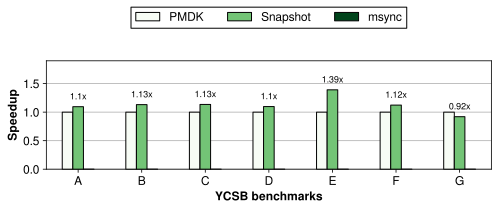

In [16]:
plt.rcParams["font.family"] = "freesans"
speedup = 1/df_norm
speedup = capitalize_index(speedup)
ax = rename_cols(speedup, {'pmdk': u'PMDK', 'snashot': u'Snapshot', 'msync': 'msync'}).plot.bar(**Fig.get_kwargs(cmap='Greens'))
f = Fig(ax)
ax.set_ylim((0, 1.9))

f.fmt_legend()
# f.fmt_label('YCSB benchmarks', 'Relative performance')
f.fmt_label('YCSB benchmarks', 'Speedup')
f.add_bar_labels([False, True, False], precision=2, fontsize=fontsize-2, over_fig=False, alpha=0)
f.xrot(rot=0)
f.fmt_grid(axis='y')
ax.set_yticks(np.arange(0, 1.7, 0.5))
save_fig('simplekv')

In [11]:
df_norm

,pmdk,snashot,msync
a,1.0,0.912970,NaN
b,1.0,0.883876,NaN
c,1.0,0.881197,NaN
d,1.0,0.910528,NaN
e,1.0,0.718653,NaN
f,1.0,0.889625,NaN
g,1.0,1.086164,NaN
